In [1]:
import os
import pandas as pd
import librosa
import soundfile as SF
import pickle

In [2]:
final_df = pd.read_pickle("mfcc.pkl")
print(final_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'mfcc.pkl'

In [4]:
final_df.shape

(25143, 2)

In [5]:
final_df

,mfcc,lid
0,"[-316.4025, 51.993893, -5.441557, 24.329988, -...",English
1,"[-331.22867, 57.39261, 35.49835, 22.748735, -2...",English
2,"[-296.94348, 85.79683, 39.07395, 38.0264, -43....",English
3,"[-309.9375, 99.889656, 28.980875, 3.6897616, -...",English
4,"[-394.24957, 122.84597, 25.030313, 7.167557, -...",English
...,...,...
25138,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",English
25139,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",Mandarin
25140,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",English
25141,"[-1131.3708, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",Mandarin


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Assuming mfcc_df is your DataFrame containing MFCC features and language labels
X = np.array(final_df['mfcc'].tolist())  # Extracting MFCC features
y = final_df['lid']  # Extracting language labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating and printing the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8226287532312587
Classification Report:
              precision    recall  f1-score   support

     English       0.82      1.00      0.90      4136
    Mandarin       1.00      0.00      0.00       893

    accuracy                           0.82      5029
   macro avg       0.91      0.50      0.45      5029
weighted avg       0.85      0.82      0.74      5029

Confusion Matrix:
[[4136    0]
 [ 892    1]]


In [ ]:

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculating balanced accuracy
bac = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bac * 100:.2f}%")

# Calculating F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculating EER (Equal Error Rate) using the confusion matrix
# For binary classification, EER is the point where False Positive Rate equals False Negative Rate
fp = conf_matrix[0, 1]  # False Positives
fn = conf_matrix[1, 0]  # False Negatives
eer = fp / (fp + fn)  # Simplified EER calculation for binary classification
print(f"EER: {eer:.4f}")


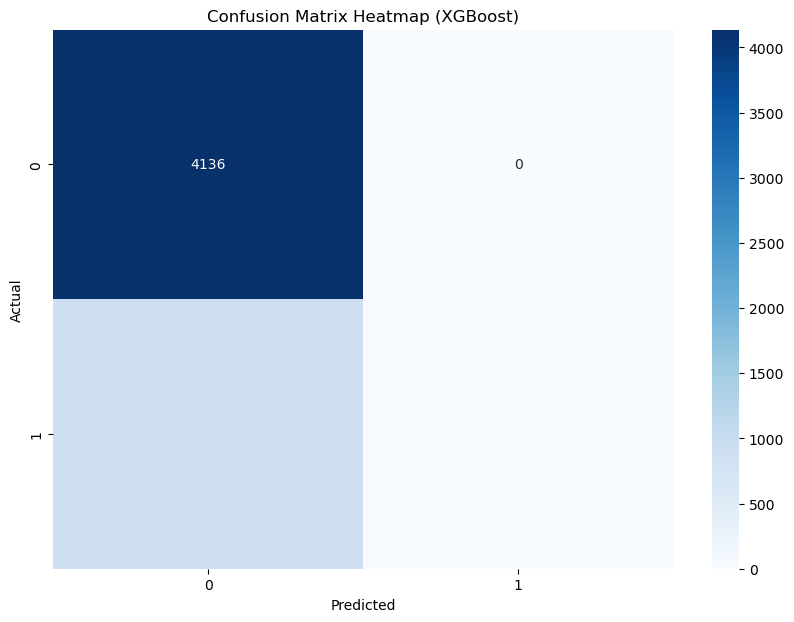

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap (XGBoost)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.7759 - loss: 0.7137 - val_accuracy: 0.8277 - val_loss: 0.4687
Epoch 2/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8225 - loss: 0.4813 - val_accuracy: 0.8285 - val_loss: 0.4657
Epoch 3/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8252 - loss: 0.4645 - val_accuracy: 0.8285 - val_loss: 0.4577
Epoch 4/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8273 - loss: 0.4606 - val_accuracy: 0.8297 - val_loss: 0.4577
Epoch 5/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8185 - loss: 0.4683 - val_accuracy: 0.8295 - val_loss: 0.4550
Epoch 6/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8271 - loss: 0.4585 - val_accuracy: 0.8292 - val_loss: 0.4908
Epoch 7/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8244 - loss: 0.4600 - val_accuracy: 0.8275 - val_loss: 0.4604
Epoch 8/20
503/503 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8274 - loss: 0.4541 - val_accurac

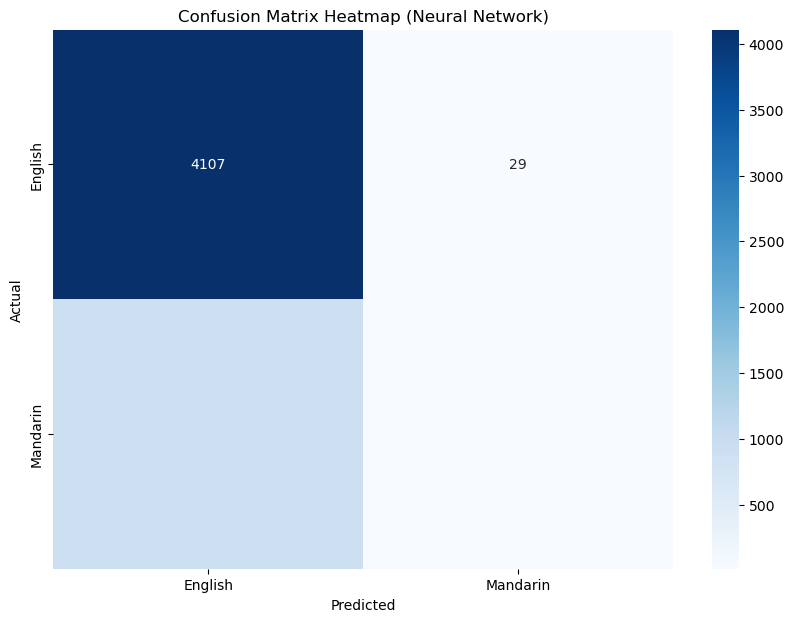

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Encoding the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Converting labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Defining the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train_categorical, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Making predictions
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Calculating accuracy
accuracy_nn = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy (Neural Network): {accuracy_nn:.4f}")

# Generating and printing the classification report for Neural Network
class_report_nn = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report (Neural Network):")
print(class_report_nn)

# Generating the confusion matrix
conf_matrix_nn = confusion_matrix(y_test_encoded, y_pred)

# Creating a DataFrame for better readability
conf_matrix_nn_df = pd.DataFrame(conf_matrix_nn, index=label_encoder.classes_, columns=label_encoder.classes_)

print("\nConfusion Matrix (Neural Network):")
print(conf_matrix_nn_df)

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap (Neural Network)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
